### 3.2 Transformée de Fourier

In [2]:
from numpy import fft
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy import signal
from scipy.io.wavfile import read
import random

**Exercice 3.6** Esquissez à la main le spectre des fonctions suivantes :

- fonction porte d'une durée de 4 s ;
- signal sinusoïdal de 10 Hz et d'une durée de 4 s ;
- signal sinusoïdal de 440 Hz et d'une durée de 4 s ;
- peigne de Dirac d'une période de 1 ms.

**Exercice 3.7** Un signal sinusoïdal a une durée de 4 périodes. Théoriquement, que peut-on dire de « sa largeur de bande » ?

#### 3.2.1 Visualisation du spectre

Dans cette section, vous allez voir les instructions qui permettent de visualiser le spectre d'un signal en utilisant principalement deux fonctions : `fft.fft` et `fft.fftshift`.  

Voici un exemple de programme permettant d'afficher la transformée de Fourier d'un sinus de 440 Hz, d'une durée de 2 s et échantillonné à 1000 Hz. L'axe des fréquences s'étend de `-Fe/2` à `Fe/2`.

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


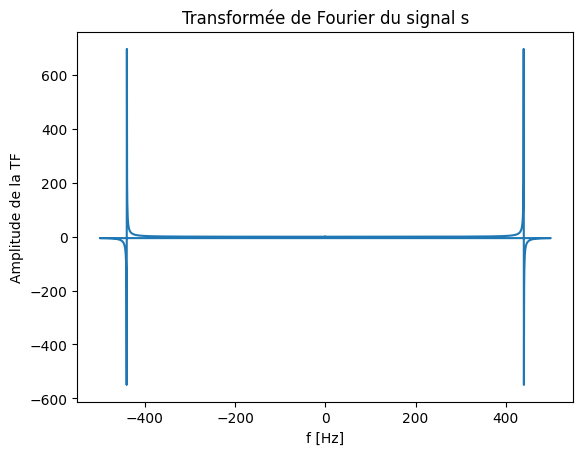

In [37]:
Fe    = 1000    # Fréquence d'échantillonnage
Te    = 1/Fe    # Période d'échantillonnage
duree = 2      # Durée du signal

# Génération du signal temporel
t  = np.arange(0, duree+Te, Te)
s  = np.sin(2*np.pi*440*t)

# Transformée de Fourier
f  = fft.fftfreq(len(t), 1/Fe) # Vecteur des fréquences
TF = fft.fft(s)                # Transformée de Fourier

# Affichage du spectre sur [-Fe/2, Fe/2]
# plt.plot(f, np.abs(TF)) # On affiche uniquement le module de la TF
plt.plot(f, TF)
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude de la TF')
plt.title('Transformée de Fourier du signal s')
plt.show()

**Dans l'ex ci-dessus :**

- Globalement on définit les valeurs pour traiter le Signal.
- Puis on définit le vecteur Temps et le **Signal** un Sinus de `440Hz`. Le vecteur Temps s'arrête à la `durée` + `la Période d'échantillonnage`.
- Puis on définit le vecteur de **Fréquences** pour la représentation `Spectrale` et on fait la `Transformée de Fourier`.
- Ensuite on l'affiche. 

***Nota Bene : Pour afficher on ne fait apparaitre que le module de la TF pour n'avoir que les données Fréquentielles Positives du Signal.***

**Exercice 3.8** Écrivez un programme qui affiche le même spectre que celui de l'exemple ci-dessus mais pour un axe des fréquences qui s'étend de `0` à `Fe/2`.

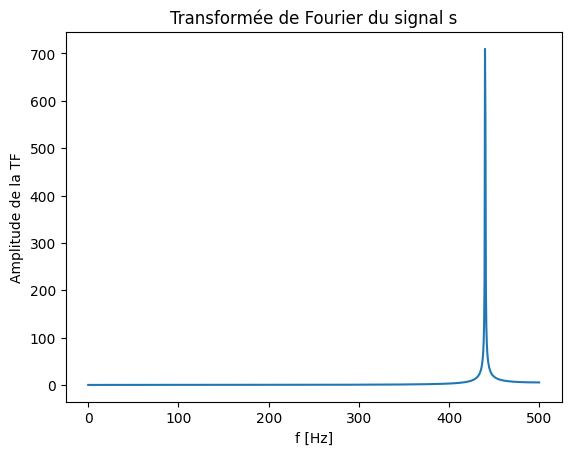

In [20]:
Fe    = 1000    # Fréquence d'échantillonnage
Te    = 1/Fe    # Période d'échantillonnage
duree = 2      # Durée du signal

# Génération du signal temporel
t  = np.arange(0, duree+Te, Te)
s  = np.sin(2*np.pi*440*t)

# Transformée de Fourier
f  = fft.fftfreq(len(t), Te) # Vecteur des fréquences
TF = fft.fft(s)                # Transformée de Fourier

# Limitation à l'intervalle [0, Fe/2]
indices_positifs = np.where(f >= 0)  # On récupère les indices des fréquences positives
f_positif = f[indices_positifs]      # Fréquences positives uniquement
TF_positif = np.abs(TF[indices_positifs])  # Module de la TF pour les fréquences positives

# Affichage du spectre sur [0, Fe/2]
plt.plot(f_positif, TF_positif) # On affiche uniquement le module de la TF
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude de la TF')
plt.title('Transformée de Fourier du signal s')
plt.show()

*Dans l'ex ci-dessus :*

- Tout est pareil que dans l'ex précédent à part que :
    
    On définit ce qu'on va afficher dans le graphique où l'on ne prends que la partie **positive** `Fréquentielle` et le `Module de la TF`.

**Exercice 3.9** Affichez la FFT d'un signal sinusoïdal de 440 Hz d'une durée de 2 s échantillonné à 2 kHz. Affichez le spectre pour des fréquences variant de 0 à `Fe/2`.

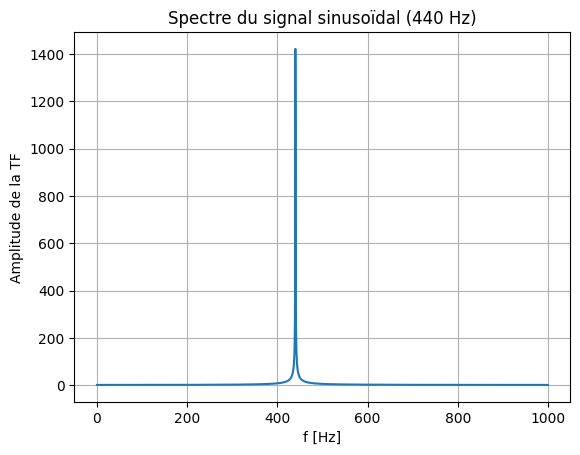

In [22]:
# Paramètres du signal
Fe = 2000       # Fréquence d'échantillonnage (2 kHz)
Te = 1/Fe       # Période d'échantillonnage
duree = 2       # Durée du signal (2 secondes)
f_sin = 440     # Fréquence du signal sinusoïdal (440 Hz)

# Génération du signal temporel
t = np.arange(0, duree+Te, Te)  # Vecteur de temps
s = np.sin(2 * np.pi * f_sin * t)  # Signal sinusoïdal de 440 Hz

# Transformée de Fourier
f = fft.fftfreq(len(t), Te)  # Vecteur des fréquences
TF = fft.fft(s)              # Calcul de la transformée de Fourier

# Limitation à l'intervalle [0, Fe/2]
indices_positifs = np.where(f >= 0)  # On récupère les indices des fréquences positives
f_positif = f[indices_positifs]      # Fréquences positives uniquement
TF_positif = np.abs(TF[indices_positifs])  # Module de la TF pour les fréquences positives

# Affichage du spectre sur [0, Fe/2]
plt.plot(f_positif, TF_positif)
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude de la TF')
plt.title('Spectre du signal sinusoïdal (440 Hz)')
plt.grid(True)
plt.show()

**Dans l'ex ci-dessus :**
- Globalement on fait pareil que dans l'ex précédent mais d'une façon un peu différente.

**Exercice 3.10** Affichez la FFT d'un signal d'une durée de 2 s constitué de la somme d'un cosinus de 50 Hz d'amplitude 2 et d'un cosinus de 440 Hz d'amplitude 1. Fixez la fréquence d'échantillonnage  à $F_e=2000$ Hz.

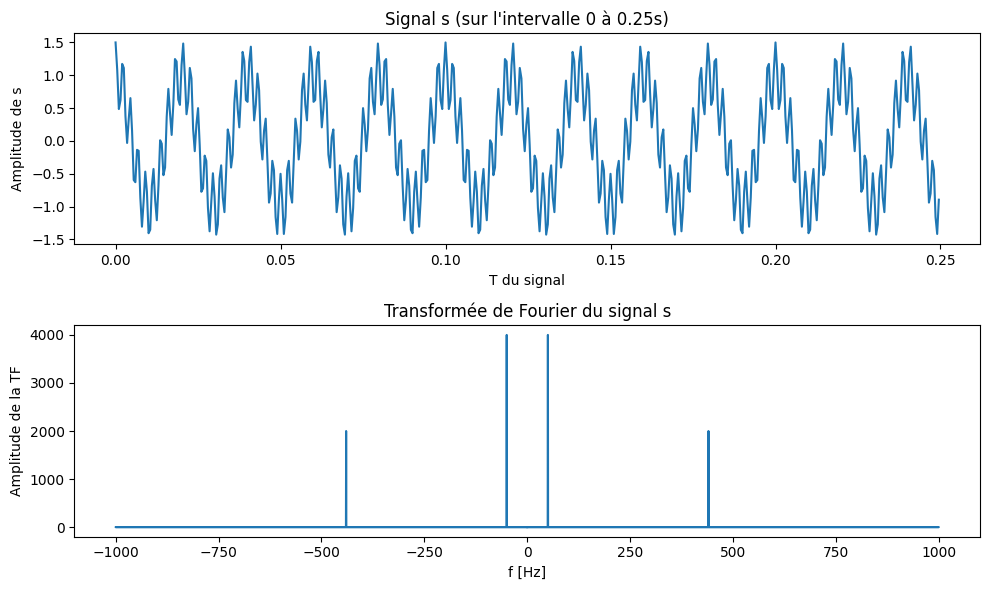

In [56]:
Fe    = 2000    # Fréquence d'échantillonnage
Te    = 1/Fe    # Période d'échantillonnage
duree = 2      # Durée du signal

# Génération du signal temporel
t  = np.arange(0, duree, Te)

# Intervalle de temps pour la représentation temporelle (0 à 0.25 s)
periode_de_temps_voulus = t[0:500]

amp1 = 2
amp2 = 1
mon_cos_Sol = amp1 * np.cos(2 * np.pi * 50 * t)
mon_cos_La = amp2 * np.cos(2 * np.pi * 440 * t)

# Signal pour la Représentation Temporel
s_signal = (mon_cos_Sol/2) + (mon_cos_La/2)
# Signal pour la Représentation Spectrale (donc Transformée de Fourier)
s_spectre  = mon_cos_Sol + mon_cos_La

# Transformée de Fourier
f  = fft.fftfreq(len(t), 1/Fe) # Vecteur des fréquences
TF = fft.fft(s_spectre)                # Transformée de Fourier

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].plot(periode_de_temps_voulus, s_signal[:len(periode_de_temps_voulus)])
ax[0].set_xlabel('T du signal')
ax[0].set_ylabel('Amplitude de s')
ax[0].set_title('Signal s (sur l\'intervalle 0 à 0.25s)')

# Affichage du spectre sur [-Fe/2, Fe/2]
ax[1].plot(f, np.abs(TF)) # On affiche uniquement le module de la TF
ax[1].set_xlabel('f [Hz]')
ax[1].set_ylabel('Amplitude de la TF')
ax[1].set_title('Transformée de Fourier du signal s')

plt.tight_layout()
plt.show()

**Dans l'ex ci-dessus :**
- On créer un **Signal sinusoïdale Composés** (en `Représentation Temporel`) qui est une **somme** de 2 **Sinus** qu'on affiche sur un intervalle de temps court car il est à une haute fréquence (sinon on verrait très difficilement le Signal, genre une bouillie tellement le Signal à une fréquence élevée).
- Ensuite on applique une **Transformée de Fourier** afin de pouvoir montrer une `Représentation Spectrale` du Signal pour voir **l\'énergie** du Signal (donc les **Amplitudes** à différentes **Fréquences**).

**Exercice 3.11** Affichez la FFT du produit d'un cosinus de 50 Hz d'amplitude 2 avec un cosinus de 440 Hz d'amplitude 1. Les deux signaux ont une durée de 2 s et une fréquence d'échantillonnage  $F_e=2000$ Hz.

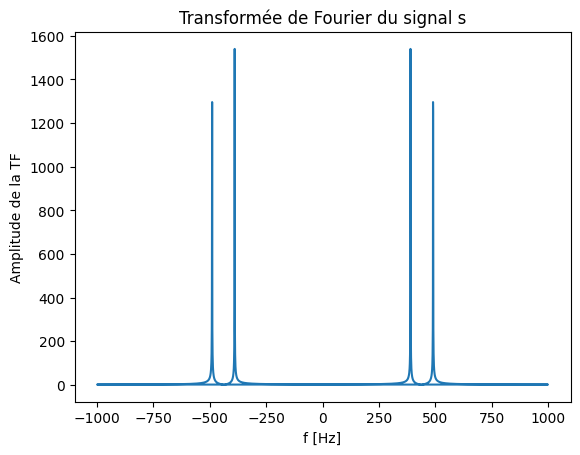

In [33]:
Fe    = 2000    # Fréquence d'échantillonnage
Te    = 1/Fe    # Période d'échantillonnage
duree = 2      # Durée du signal

# Génération du signal temporel
t  = np.arange(0, duree+Te, Te)

amp1 = 2
amp2 = 1
mon_cos_Sol = amp1 * np.cos(2 * np.pi * 50 * t)
mon_cos_La = amp2 * np.cos(2 * np.pi * 440 * t)
s  = mon_cos_Sol * mon_cos_La

# Transformée de Fourier
f  = fft.fftfreq(len(t), 1/Fe) # Vecteur des fréquences
TF = fft.fft(s)                # Transformée de Fourier

# Affichage du spectre sur [-Fe/2, Fe/2]
plt.plot(f, np.abs(TF)) # On affiche uniquement le module de la TF
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude de la TF')
plt.title('Transformée de Fourier du signal s')
plt.show()

**Dans l'ex ci-dessus :**
- Comme dans l'ex précédent, sauf qu'on s'amuse juste à faire un **produit** de 2 Sinus et à afficher le `Spectre` de ce **Signal**.

**Exercice 3.12** Affichez la FFT de l'autocorrélation d'un signal sinusoïdal de 440 Hz d'une durée de 2 s échantillonné à 2 kHz. Affichez le spectre pour des fréquences variant de `0` à `Fe/2` et avec une échelle en dB pour l'axe des ordonnées.

Représentez ensuite la <i>densité spectrale de puissance</i> (PSD) de ce signal sinusoïdal, en dB (Rem: en dBm, on prendra 1 mW  et une impédance de $50\,\Omega$ comme référence.). <i>Indication</i> : si la transformée de Fourier d'un signal est $S(f)$, sa PSD est donnée par $20\log{S(f)}$.

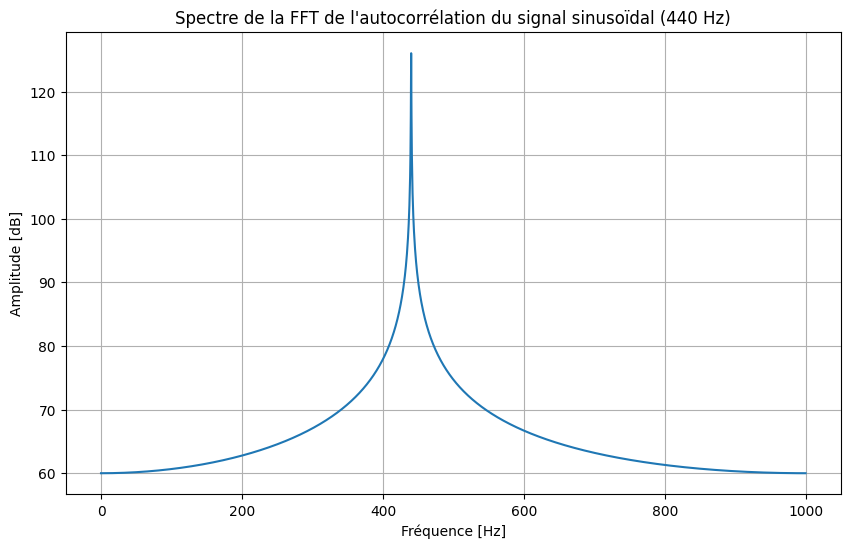

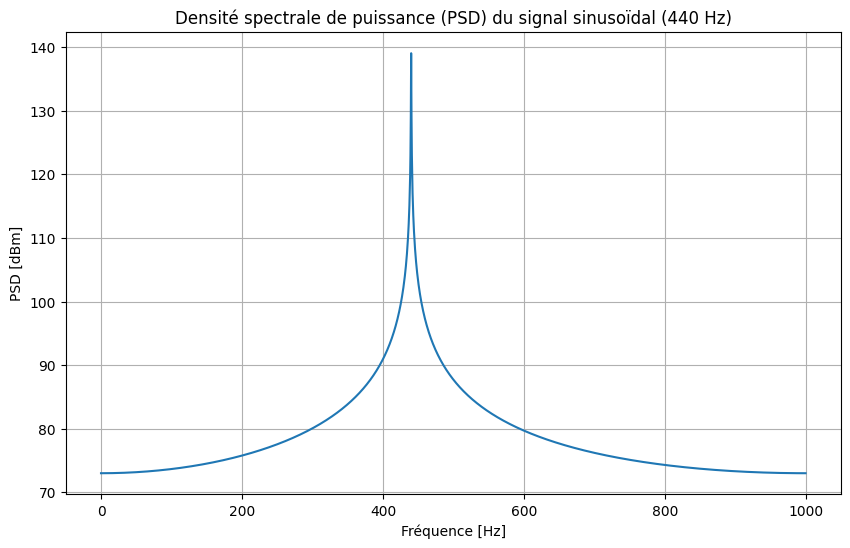

In [36]:
# Paramètres du signal
Fe = 2000          # Fréquence d'échantillonnage (2 kHz)
Te = 1/Fe          # Période d'échantillonnage
duree = 2          # Durée du signal (2 secondes)
f_sin = 440        # Fréquence du signal sinusoïdal (440 Hz)

# Génération du signal sinusoïdal
t = np.arange(0, duree, Te)    # Vecteur de temps
s = np.sin(2 * np.pi * f_sin * t)  # Signal sinusoïdal de 440 Hz

# Calcul de l'autocorrélation du signal
auto_corr = np.correlate(s, s, mode='full')  # Autocorrélation du signal
auto_corr = auto_corr[len(auto_corr)//2:]    # Prendre la seconde moitié (positive)

# Calcul de la FFT de l'autocorrélation
f = fft.fftfreq(len(auto_corr), Te)         # Vecteur des fréquences
TF_auto_corr = fft.fft(auto_corr)           # Transformée de Fourier de l'autocorrélation

# Limitation à l'intervalle [0, Fe/2]
indices_positifs = np.where(f >= 0)         # On récupère les fréquences positives
f_positif = f[indices_positifs]             # Fréquences positives uniquement
TF_auto_corr_positif = np.abs(TF_auto_corr[indices_positifs])  # Module de la TF positive

# Conversion en dB
TF_dB = 20 * np.log10(TF_auto_corr_positif)

# Affichage du spectre en dB
plt.figure(figsize=(10, 6))
plt.plot(f_positif, TF_dB)
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude [dB]')
plt.title('Spectre de la FFT de l\'autocorrélation du signal sinusoïdal (440 Hz)')
plt.grid(True)
plt.show()

# Calcul de la densité spectrale de puissance (PSD) en dBm
# Avec 1 mW comme référence et une impédance de 50 ohms
psd_dBm = 10 * np.log10(TF_auto_corr_positif ** 2 / 50 / 1e-3)  # PSD en dBm

# Affichage de la densité spectrale de puissance en dBm
plt.figure(figsize=(10, 6))
plt.plot(f_positif, psd_dBm)
plt.xlabel('Fréquence [Hz]')
plt.ylabel('PSD [dBm]')
plt.title('Densité spectrale de puissance (PSD) du signal sinusoïdal (440 Hz)')
plt.grid(True)
plt.show()

**Dans l'ex ci-dessus :**
- Ici on fait une `Représentation Spectrale` de `l'autocorrelation` de **ce même Signal Sinusoïdale** sur une échelle en *dB*.
- Ensuite on fait une Représentation de `la Densité Spectrale` de ce Signal avec une puissance *PSD* le tout sur une échelle en *dBm*.

#### **À Retenir :**

- `np.correlate()` est une fonction qui va faire (et afficher seulement) une `correlation` entre 2 Signaux, donc seulement les *Pics* qui correlent / qui matchent car de mêmes valeurs.
- Le `Module d'une TF` est une fonction `Paire` qui dans une `Représentation Spectrale` apparait sous la forme de **l'amplitude** d'une **Fréquence** et qui nous indique donc son taux de présence et d'importance dans ce Signal. (Ca veut dire que + un *Pic* est haut + cette Fréquence est **importante** et **présente** dans ce Signal) --> *ça nous dit en gros* **"à quelle point chaque fréquence contribue au Signal"**.